### Import Library dan Dataset

In [20]:
# Import Library
import pandas as pd
pd.options.display.max_columns = 50

# Import Dataset
df_load = pd.read_csv('../../Dataset/dqlab_telco.csv')

In [2]:
# Menampilkan jumlah baris dan kolom
df_load.shape

(7113, 22)

In [3]:
# Menampilkan 5 data teratas
df_load.head()

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,202006,45557574145,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,202006,45366876421,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,202006,45779536532,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,202006,45923787906,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Jumlah ID yang unik
df_load.customerID.nunique()

7017

### Memfilter ID Number Pelanggan Format Tertentu

Mencari format ID Number (Phone Number) Pelanggan customerID yang benar, dengan kriteria:

1. Panjang karakter adalah 11-12.
2. Terdiri dari angka Saja, tidak diperbolehkan ada karakter selain angka
3. Diawali dengan angka 45 2 digit pertama.

In [5]:
df_load['valid_id'] = df_load['customerID'].str.match(r'(45\d{9, 10})')

In [6]:
# df_load = (df_load[df_load['valid_id'] == True]).drop('valid_id', axis=1)  # data nya udah bener jadi di komen aja
print('Hasil jumlah ID Customer yang terfilter adalah', df_load['customerID'].count())

Hasil jumlah ID Customer yang terfilter adalah 7113


### Memfilter Duplikasi ID Number Pelanggan

Memastikan bahwa tidak ada Id Number pelanggan yang duplikat. Biasanya duplikasi ID number ini tipenya:

1. Duplikasi dikarenakan inserting melebihi satu kali dengan nilai yang sama tiap kolomnya
2. Duplikasi dikarenakan inserting beda periode pengambilan data

In [7]:
# Drop Duplicate Rows
df_load = df_load.drop_duplicates()

# Drop duplicate ID sorted by Periode
df_load = df_load.sort_values('UpdatedAt', ascending=False).drop_duplicates(['customerID'])
print('Hasil jumlah ID Customer yang sudah dihilangkan duplikasinya (distinct) adalah', df_load['customerID'].count())

Hasil jumlah ID Customer yang sudah dihilangkan duplikasinya (distinct) adalah 7017


### Mengatasi Missing Values dengan Penghapusan Rows

In [8]:
print('Total missing values data dari kolom Churn', df_load['Churn'].isnull().sum())

Total missing values data dari kolom Churn 43


In [9]:
# Dropping all Rows with spesific column (churn)
df_load.dropna(subset=['Churn'], inplace=True)
print('Total Rows dan Kolom Data setelah dihapus data Missing Values adalah ', df_load.shape)

Total Rows dan Kolom Data setelah dihapus data Missing Values adalah  (6974, 23)


### Mengatasi Missing Values dengan Pengisian Nilai tertentu

In [10]:
print('Status Missing Values :', df_load.isnull().values.any())

Status Missing Values : True


In [11]:
print('Jumlah Missing Values masing-masing kolom, adalah:')
print(df_load.isnull().sum().sort_values(ascending=False))

Jumlah Missing Values masing-masing kolom, adalah:
tenure              99
MonthlyCharges      26
TotalCharges        15
UpdatedAt            0
DeviceProtection     0
Churn                0
PaymentMethod        0
PaperlessBilling     0
Contract             0
StreamingMovies      0
StreamingTV          0
TechSupport          0
OnlineBackup         0
customerID           0
OnlineSecurity       0
InternetService      0
MultipleLines        0
PhoneService         0
Dependents           0
Partner              0
SeniorCitizen        0
gender               0
valid_id             0
dtype: int64


In [12]:
#handling missing values Tenure fill with 11
df_load['tenure'].fillna(11, inplace=True)

In [13]:
#Loop
#Handling missing values num vars (except Tenure)
for col_name in list(['MonthlyCharges', 'TotalCharges']):
    median = df_load[col_name].median()
    df_load[col_name].fillna(median, inplace=True)

print('Jumlah missing values setelah di imputer datanya, adalah:') 
print(df_load.isnull().sum().sort_values(ascending=False))

Jumlah missing values setelah di imputer datanya, adalah:
UpdatedAt           0
DeviceProtection    0
Churn               0
TotalCharges        0
MonthlyCharges      0
PaymentMethod       0
PaperlessBilling    0
Contract            0
StreamingMovies     0
StreamingTV         0
TechSupport         0
OnlineBackup        0
customerID          0
OnlineSecurity      0
InternetService     0
MultipleLines       0
PhoneService        0
tenure              0
Dependents          0
Partner             0
SeniorCitizen       0
gender              0
valid_id            0
dtype: int64


### Mendeteksi adanya Outlier (Boxplot)

Mendeteksi pencilan dari suatu nilai (outlier) salah satunya bisa melihat plot dari data tersebut menggunakan boxplot. Boxplot merupakan ringkasan distribusi sampel yang disajikan secara grafis yang bisa menggambarkan bentuk distribusi data (skewness), ukuran tendensi sentral dan ukuran penyebaran (keragaman) data pengamatan.

In [14]:
print('Persebaran data sebelum ditangani Outlier: ')
df_load[['tenure','MonthlyCharges','TotalCharges']].describe()

Persebaran data sebelum ditangani Outlier: 


,tenure,MonthlyCharges,TotalCharges
count,6974.000000,6974.00000,6974.000000
mean,32.442931,65.78736,2303.356101
std,25.181170,50.40506,2577.178788
min,0.000000,0.00000,19.000000
25%,9.000000,36.45000,404.662500
50%,29.000000,70.45000,1400.550000
75%,55.000000,89.85000,3793.775000
max,500.000000,2311.00000,80000.000000


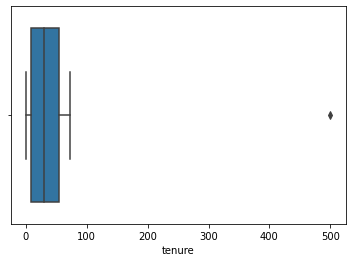

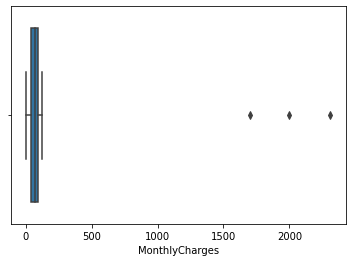

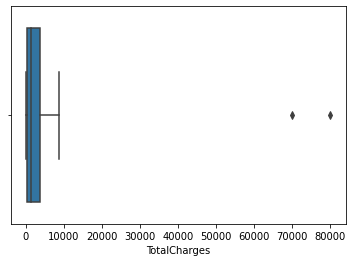

In [15]:
# Creating Box Plot
import matplotlib.pyplot as plt
import seaborn as sns

for col_name in list(['tenure', 'MonthlyCharges', 'TotalCharges']):
    plt.figure() # untuk membuat figure baru
    sns.boxplot(x=df_load[col_name])
    plt.show()

### Mengatasi Outlier

Setelah kita mengetahui variable mana saja yang terdapat pencilan (outlier), selanjutnya kita akan atasi outlier dengan menggunakan metode interquartile range (IQR).

In [16]:
# Handling with IQR
Q1 = (df_load[['tenure', 'MonthlyCharges', 'TotalCharges']]).quantile(0.25)
Q3 = (df_load[['tenure', 'MonthlyCharges', 'TotalCharges']]).quantile(0.75)

In [17]:
IQR = Q3 - Q1
maximum = Q3 + (1.5*IQR)
print('Nilai Maximum dari masing-masing Variable adalah:')
print(maximum)
minimum = Q1 - (1.5 * IQR)
print('Nilai Minimum dari masing-masing Variable adalah:')
print(minimum)

more_than = (df_load > maximum)
lower_than = (df_load < minimum)
df_load = df_load.mask(more_than, maximum, axis=1)
df_load = df_load.mask(lower_than, minimum, axis=1)

print('Persebaran data setelah ditangani Outlier:')
print(df_load[['tenure', 'MonthlyCharges', 'TotalCharges']].describe())

Nilai Maximum dari masing-masing Variable adalah:
tenure             124.00000
MonthlyCharges     169.95000
TotalCharges      8877.44375
dtype: float64
Nilai Minimum dari masing-masing Variable adalah:
tenure             -60.00000
MonthlyCharges     -43.65000
TotalCharges     -4679.00625
dtype: float64
Persebaran data setelah ditangani Outlier:
            tenure  MonthlyCharges  TotalCharges
count  6974.000000     6974.000000   6974.000000
mean     32.389016       64.998552   2284.393510
std      24.575185       30.037725   2265.154806
min       0.000000        0.000000     19.000000
25%       9.000000       36.450000    404.662500
50%      29.000000       70.450000   1400.550000
75%      55.000000       89.850000   3793.775000
max     124.000000      169.950000   8877.443750


C:\Users\numbe\AppData\Local\Temp/ipykernel_296/2349869302.py:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  more_than = (df_load > maximum)
C:\Users\numbe\AppData\Local\Temp/ipykernel_296/2349869302.py:10: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  lower_than = (df_load < minimum)


**Kesimpulan**<br>
Dari ketiga boxplot dengan variable 'tenure','MonthlyCharges' & 'TotalCharges' terlihat jelas bahwasannya ada outlier. Hal ini bisa di identifikasi dari adanya titik-titik yang berada jauh dari gambar boxplot-nya. Kemudian kalau kita liat persebaran datanya dari kolom max nya juga ada nilai yang sangat tinggi sekali.

Kemudian nilai outlier tersebut ditangani dengan cara merubah nilainya ke nilai maximum & minimum dari interquartile range (IQR). Setelah di tangani outlier-nya, dan dilihat perseberan datanya, terlihat sudah tidak ada lagi nilai yang outlier.

### Mendeteksi Nilai yang tidak Standar

Mendeteksi apakah ada nilai-nilai dari variable kategorik yang tidak standard. Hal ini biasanya terjadi dikarenakan kesalahan input data. Perbedaan istilah menjadi salah satu faktor yang sering terjadi, untuk itu dibutuhkan standardisasi dari data yang sudah ter-input.

In [18]:
df_load['SeniorCitizen'] = df_load['SeniorCitizen'].astype('object')

In [29]:
for col_name in list(df_load.select_dtypes(include='object').columns.drop('customerID')):
    print('\nUnique Values Count \033[1m' + 'Before Standardized \033[0m Variable', col_name)
    print(df_load[col_name].value_counts())


Unique Values Count Before Standardized  Variable gender
Male         3581
Female       3512
Wanita         14
Laki-Laki       6
Name: gender, dtype: int64

Unique Values Count Before Standardized  Variable Partner
No     3676
Yes    3437
Name: Partner, dtype: int64

Unique Values Count Before Standardized  Variable Dependents
No     4978
Yes    2115
Iya      20
Name: Dependents, dtype: int64

Unique Values Count Before Standardized  Variable PhoneService
Yes    6423
No      690
Name: PhoneService, dtype: int64

Unique Values Count Before Standardized  Variable MultipleLines
No                  3428
Yes                 2995
No phone service     690
Name: MultipleLines, dtype: int64

Unique Values Count Before Standardized  Variable InternetService
Fiber optic    3125
DSL            2451
No             1537
Name: InternetService, dtype: int64

Unique Values Count Before Standardized  Variable OnlineSecurity
No                     3531
Yes                    2045
No internet service    

### Menstandarisasi Variable Kategorik

Setelah kita mengeteahui variable mana saja yang ada nilai tidak standard, maka kita standardkan dengan pola terbanyak nya, dengan syarat tanpa mengubah maknanya. Contoh : Iya -> Yes Kemudian liat kembali unique values dari masing-masing variable yang sudah di ubah.

In [32]:
df_load = df_load.replace(['Wanita', 'Laki-Laki', 'Churn', 'Iya'], ['Female', 'Male', 'Yes', 'Yes'])

#Loop
for col_name in list(['gender', 'Dependents', 'Churn']):
    print('\nUnique Values Count \033[1m' + 'After Standardized\033[0m Variable', col_name)
    print(df_load[col_name].value_counts())


Unique Values Count After Standardized Variable gender
Male      3587
Female    3526
Name: gender, dtype: int64

Unique Values Count After Standardized Variable Dependents
No     4978
Yes    2135
Name: Dependents, dtype: int64

Unique Values Count After Standardized Variable Churn
No     5195
Yes    1875
Name: Churn, dtype: int64


**Kesimpulan**
Ketika kita amati lebih jauh dari jumlah unique value dari masing-masing variable kategorik, terlihat jelas bahwa ada beberapa variable yang tidak standar. Variable itu adalah:

1. Gender (Female, Male, Wanita, Laki-Laki), yang bisa di standardkan nilainya menjadi (Female, Male) karena mempunyai makna yang sama.
2. Dependents (Yes, No, Iya), yang bisa di standardkan nilainya menjadi (Yes, No) karena mempunyai makna yang sama.
3. Churn (Yes, No, Churn), yang bisa di standardkan nilainya menjadi (Yes, No) karena mempunyai makna yang sama.
Setelah kita standardkan nilainya, dan kita amati kembali bentuk datanya, sudah terstandar dengan baik untuk unique value-nya.